# Introduction to Data Science
## Homework 3

Student Name: Pavel Gladkevich

Student Netid: N16902345
***

### Part 1 (5 Points)
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

$$ \text{We can make use of the given Entropy equation and plug in the condtional Y|X=x for the value of Y.} \\ \text{Then using the Information gain equation as follows:} \quad H(Y) – H(Y \mid X) \quad \text{we plug in} \\ $$

$$ \\    =  -\sum_{y \in Y} p(y) \cdot log(p(y)) + \sum_{x \in X} p(x) \cdot H(Y \mid X = x) $$
$$ \text{And using the marginal we can then create a summation of x and y for the H(Y) portion} \\ $$
$$ = \sum_{x \in X} \sum_{y \in Y} p(x) p(y|x) \cdot log(p(y|x)) - \sum_{y \in Y} \sum_{x \in X} p(x,y) \cdot log(p(y))$$ $$= \sum_{x \in X} \sum_{y \in Y} p(x,y) \cdot log(p(y|x)) - \sum_{y \in Y} \sum_{x \in X} p(x,y) \cdot log(p(y))$$
$$= \sum_{y \in Y} \sum_{x \in X} p(x,y) \cdot log\frac{p(y|x)}{p(y)}$$
$$= \sum_{y \in Y} \sum_{x \in X} p(x,y) \cdot log\frac{p(y|x)p(x)}{p(y)p(x)}$$
$$= \sum_{y \in Y} \sum_{x \in X} p(x,y) \cdot log\frac{p(x,y)}{p(x)p(y)} = \text{Mutual Information} $$

### Part 2 - Preparing a Training Set and Training a Decision Tree (10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function in numpy but DO NOT use the data splitting functions from Sklearn.

In [1]:
import numpy as np
import os
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

cwd = os.getcwd()
colnames = ["revenue", "outcalls", "incalls", "months", "eqpdays", "webcap", "marryyes", "travel", "pcown", "creditcd", "retcalls", "churndep"]
whole = pd.read_csv(cwd + "/cell2cell_data.csv", names = colnames)

pct_cutoff = 0.8
rand = np.random.rand(whole.shape[0])
rand_filt = (rand < pct_cutoff)
train_df = whole[rand_filt]
test_df = whole[(rand_filt == False)]


In [2]:
pd.read_csv?

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

Taken from the lecture notes: "If being in the sample S is independent of the features then the sample is unbiased" Thus, if we design a test to determine if the P(S| feature i) = P(S) for every feature, then the sampling is unbiased. We could do this computationally via statistical libraries and calculations. 

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [184]:
dt = DecisionTreeClassifier(criterion = 'entropy')
xtrain = train_df.iloc[:, :-1]
ytrain = train_df.iloc[:, -1 :]
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy')

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!). Make sure the bar plot is sorted by increasing feature importance values.

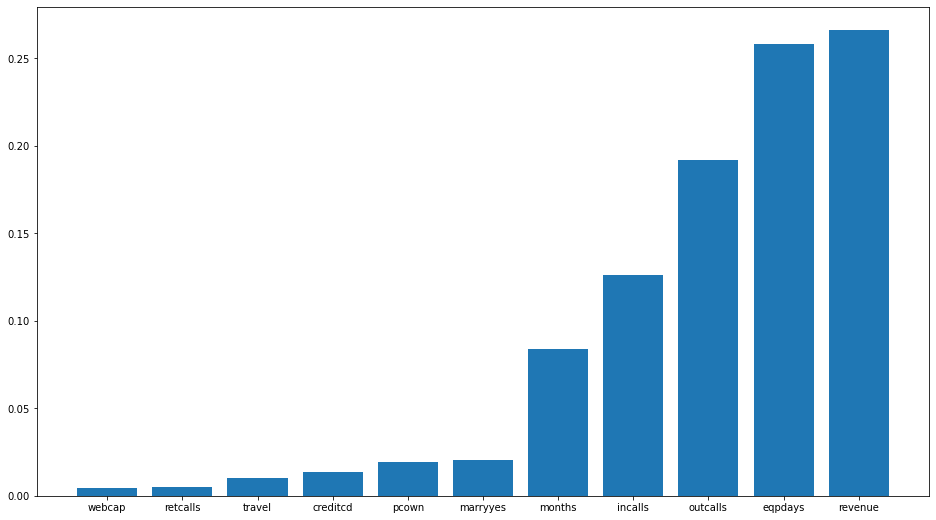

In [185]:
import collections as co
import matplotlib.pyplot as plt
%matplotlib inline

feature_mi = dt.feature_importances_
#Add features and their importances to a dictionary
feature_mi_dict = co.OrderedDict(zip(train_df.columns.values, feature_mi))
feature_mi_dict = co.OrderedDict(sorted(feature_mi_dict.items(), key=lambda t: t[1]))

plt.figure(figsize=(16,9))
plt.bar(range(len(feature_mi_dict)), feature_mi_dict.values(), align = 'center')
_ = plt.xticks(range(len(feature_mi_dict)), feature_mi_dict.keys())

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome? What "real-life" connection can you draw between each variable and churn? Make sure to state your answer, and not just show code.

In [186]:
train_df[["outcalls", "eqpdays", "revenue", "churndep"]].corr()

,outcalls,eqpdays,revenue,churndep
outcalls,1.000000,-0.243149,0.502163,-0.035062
eqpdays,-0.243149,1.000000,-0.222041,0.110784
revenue,0.502163,-0.222041,1.000000,-0.011655
churndep,-0.035062,0.110784,-0.011655,1.000000


Using this correlation matrix we can tell that the relationship between the `outcalls` and `eqpdays` is negative which makes sense because if a customer has an old phone they are more likely to not want to use it too often. The relationship between `outcalls` and `revenue` is positive, which aligns with the idea that people who upgrade their phone more frequently use it more frequently as well. The relationship between `eqpdays` and `revenue` is is negative, since a customer who doesn't upgrade their phone frequently probably spends less on their phone bill in general. Both `outcalls` and `revenue` are negatively correlated with `churndep` while `eqpdays` is positively correlated. This makes sense as the larger the amount of calls a user makes and the more money the company makes off of the user are signs that the user utilizes their plan, thus making them less likely to churn. Conversely, not updating their equipment are signs that the user is not fully utilizing their plan make them more likely to churn.

6\. Using the classifier built in 2.3, try predicting "churndep" on both the train_df and test_df data sets. What is the accuracy on each? What is your explanation on the difference (or lackthereof) between the two accuracies?

In [187]:
from sklearn.metrics import accuracy_score 

xtest = test_df.iloc[:, :-1]
ytest = test_df.iloc[:, -1 :]
print(accuracy_score(dt.predict(xtrain), ytrain))
print(accuracy_score(dt.predict(xtest), ytest))

0.9998123064410173
0.5414343639128231


The accuracy score of the training set is very high at 99%, while the accuracy score of the test data is fairly low at around 54%. This is a signal that the model overfit the training data. Likely it was a result of a lack of a cutoff for the leaf nodes, which made the decision tree search deeper and deeper for connections. As a consequence the model does not generalize to new data.

### Part 3 - Finding a Good Decision Tree (10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [283]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

min_samples_split_values = [200, 400, 800, 1000, 1200, 1400, 1600, 1800, 4000, 8000]
min_samples_leaf_values =  [50, 75, 100, 125, 150, 175, 200, 250, 300, 500]

2\. Explain in words your reasoning for choosing the above ranges.

I chose the following ranges based off of the need to not overfit and have leaf values that are large enough to generalize better. Additionally the number of split values should be equivalent to the different classes of customers. Based off of my observations this split number should be fairly high in the 1000s but we can include some samples at the lower and upper ranges to confirm this observation. The leaf depth quickly collapsed the accuracy for values greater than 500 so this range had to be cutoff there.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

In [287]:
from pandas import DataFrame
import collections as co
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# First get the parameter combinations
params = []
for i in range(10):
    for j in range(10):
        params.append([min_samples_split_values[i], min_samples_leaf_values[j]])
        
# Create a function that takes input of SPLIT value, LEAF value and returns a classifier object
def dtree_creator(split, leaf):
    dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = split, min_samples_leaf = leaf)
    return dt

""" Function that takes a DT decision tree object as input and outputs an accuracy score that is computed
by running the prediction with the given XTRAIN, YTRAIN, XTEST, YTEST dataframes. """
def accuracy(dt, xtrain, ytrain, xtest, ytest):
    dt.fit(xtrain, ytrain)
    return accuracy_score(dt.predict(xtest), ytest)

# Run a loop over the parameters and store them in a list with the computed accuracy as the third value
for i in range(len(params)): 
    dt = dtree_creator(params[i][0], params[i][1])
    acc = accuracy(dt, xtrain, ytrain, xtest, ytest)
    params[i] = [params[i][0], params[i][1], acc]
    
df_pacc = DataFrame (params,columns=['min_samples_split', 'min_samples_leaf', 'accuracy'])

Text(0, 0.5, 'test_accuracy')

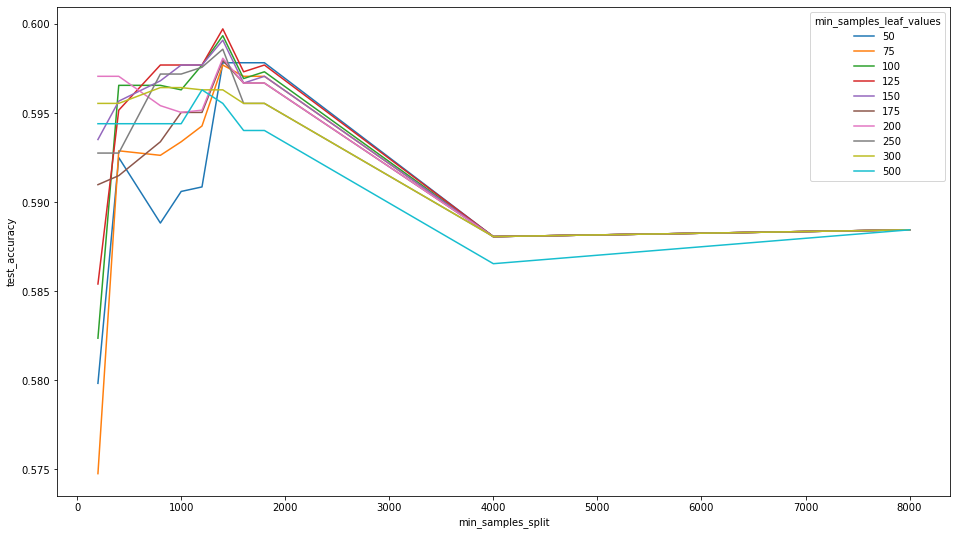

In [288]:
plt.figure(figsize=(16,9))
for leaf in min_samples_leaf_values:
    plt.plot(df_pacc.min_samples_split[df_pacc['min_samples_leaf'] == leaf], 
             df_pacc.accuracy[df_pacc['min_samples_leaf'] == leaf], label = leaf)

plt.legend(title='min_samples_leaf_values')
plt.xlabel('min_samples_split')
plt.ylabel('test_accuracy')

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values), and reassess your answer in Q3.2.

In [286]:
df_pacc_max = df_pacc[df_pacc['accuracy'] == df_pacc.accuracy.max()]
df_pacc_max

,min_samples_split,min_samples_leaf,accuracy
53,1400,125,0.599721


The best accuracy was attained with the minimum number of samples split being 1400 and the minimum number of leaf samples 125. The highest value for accuracy that we achieved is about 60%. While this is an improvement on 54% there is a lot of work to be done.

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

Churn prediction is essential for retaining customers. By identifying which customers are most likely to churn we can make targetted offers to retain those vulnerable customers. Additionally, with or churn prediction model we could assess hundreds of thousands of customers at once, 